# Andrei Zipis 29957115

## Research question/interests

Briefly describe your research question or interests here.

___

Can you accurately predict end of season standings from the first 20 games?  
Do 538's Game Quality scores accurately represent what humans perceive to be a quality game?  
Does a higher fan attendance result in a higher home advantage vs. lower?

___
## Milestone 2 - Initial Loading of database (obsolete, but left in for visibility)

Loading initial database

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#set sns styles and font
sns.set_style("darkgrid")
sns.set(font_scale=1.3)

In [3]:
#load initial data set
#df = pd.read_csv("../data/raw/nhl_elo_2022.csv")
#display(df)

In [4]:
#process attendance data, save to csv
#df1 = pd.read_excel("../data/raw/average_home_attendance_2021-22.xlsx", sheet_name="Data")
#df1 = df1.drop(columns="Unnamed: 0")
#df1 = df1.drop(df1.index[0:4])
#df1 = df1.reset_index()
#df1 = df1.drop(columns="index")
#df1 = df1.rename(columns={"Unnamed: 1": "home_team", "Unnamed: 2": "avg_attendance"})
#df1.to_csv("attendance_processed.csv", index=None)


In [5]:
#merge main data set with attendance
#attendance_df = pd.read_csv("../data/processed/attendance_processed.csv")
#df_combined = pd.merge(df, attendance_df, on="home_team")
#df_combined.to_csv("nhl_elo_processed.csv", index=None)

In [6]:
df = pd.read_csv("../data/processed/nhl_elo_processed.csv")
df.head(5)

,season,date,playoff,neutral,status,ot,home_team,away_team,home_team_abbr,away_team_abbr,...,home_team_expected_points,away_team_expected_points,home_team_score,away_team_score,home_team_postgame_rating,away_team_postgame_rating,game_quality_rating,game_importance_rating,game_overall_rating,avg_attendance
0,2022,2021-10-12,0,0,post,NaN,Tampa Bay Lightning,Pittsburgh Penguins,TBL,PIT,...,1.311921,0.918273,2,6,1561.096238,1545.711971,95,35,65,19092
1,2022,2021-10-19,0,0,post,NaN,Tampa Bay Lightning,Florida Panthers,TBL,FLA,...,1.309136,0.921574,1,4,1559.747181,1544.088770,95,32,63,19092
2,2022,2021-10-23,0,0,post,SO,Tampa Bay Lightning,Colorado Avalanche,TBL,COL,...,1.257830,0.976549,3,4,1556.869784,1556.798962,96,30,63,19092
3,2022,2021-10-28,0,0,post,NaN,Tampa Bay Lightning,Arizona Coyotes,TBL,ARI,...,1.463705,0.755541,5,1,1559.685020,1457.612573,50,18,34,19092
4,2022,2021-11-01,0,0,post,NaN,Tampa Bay Lightning,Washington Capitals,TBL,WSH,...,1.288894,0.943267,3,2,1561.564304,1538.993398,94,33,63,19092


---

## Milestone 3 Task 1 - Exploratory Data Analysis (EDA)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,1401.0,2022.000000,0.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000
playoff,1401.0,0.063526,0.243994,0.000000,0.000000,0.000000,0.000000,1.000000
neutral,1401.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
home_team_pregame_rating,1401.0,1508.771193,52.955007,1399.418091,1460.874687,1513.279154,1554.049915,1631.676028
away_team_pregame_rating,1401.0,1508.743887,52.904091,1396.925277,1461.013613,1514.439258,1553.575066,1633.950631
home_team_winprob,1401.0,0.569705,0.099804,0.294438,0.499517,0.572543,0.642184,0.798289
away_team_winprob,1401.0,0.430295,0.099804,0.201711,0.357816,0.427457,0.500483,0.705562
overtime_prob,1401.0,0.231665,0.008750,0.204465,0.226127,0.233155,0.238859,0.244079
home_team_expected_points,1401.0,1.239719,0.174404,0.742925,1.121162,1.245643,1.365458,1.637821
away_team_expected_points,1401.0,0.991946,0.180698,0.566644,0.861169,0.989604,1.122858,1.475410


Text(0.5, 1.0, 'Correlation between data columns')

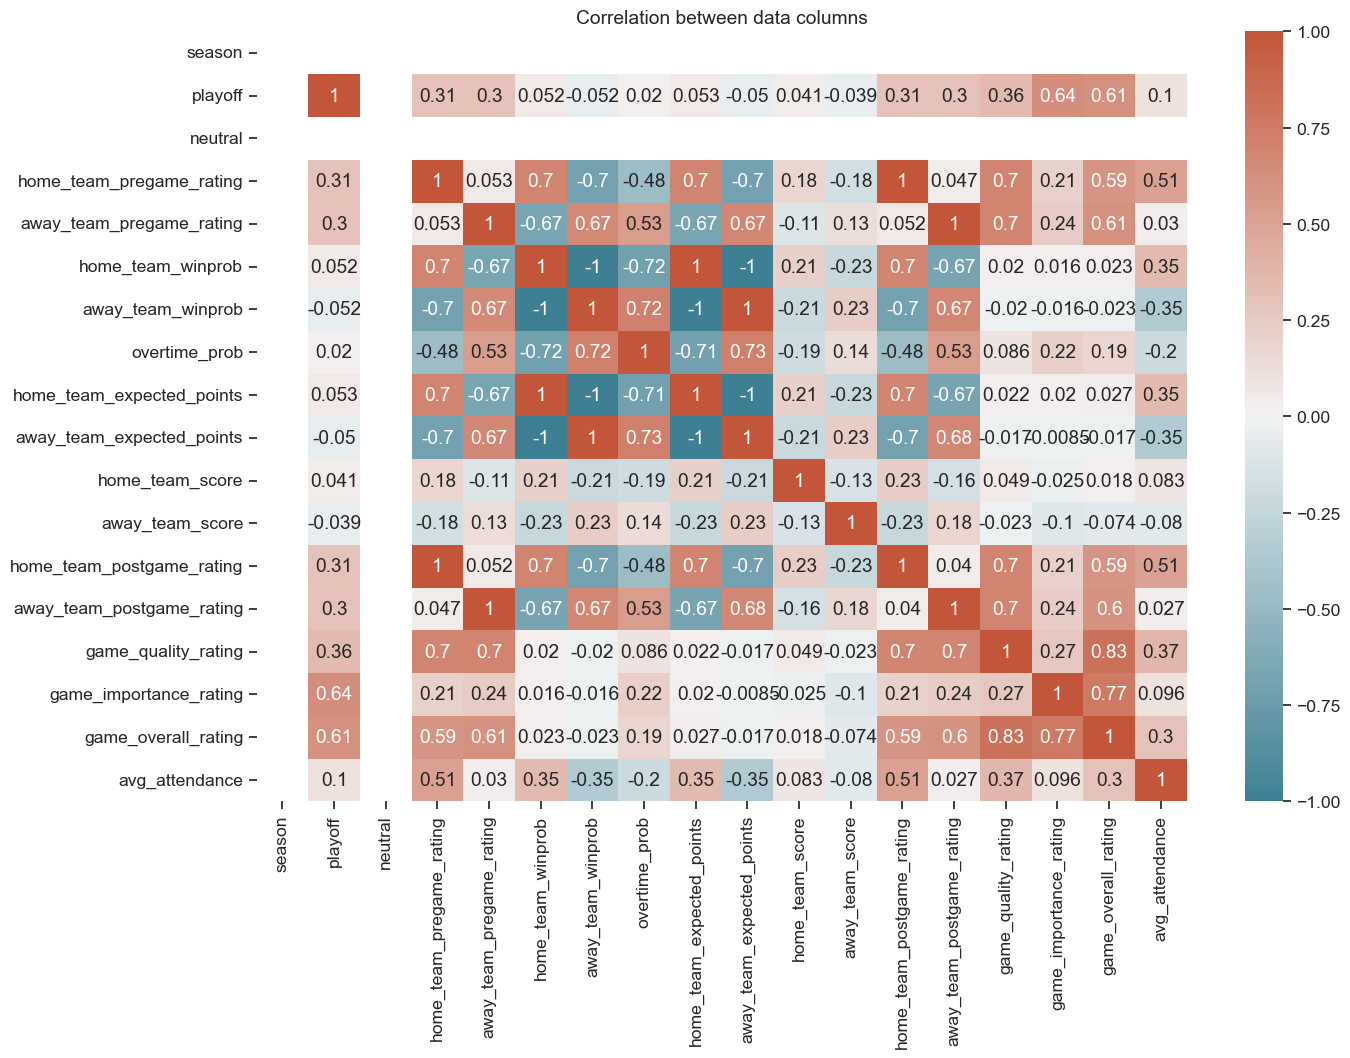

In [8]:
# calculate correlation matrix
corr = df.corr()# plot the heatmap
plt.figure(figsize=(15,10))
sns.set_theme(style="ticks", font_scale=1.15)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title("Correlation between data columns")

## The above heatmap shows correlations between my columns.
In my opinion, there are no correlations that stand out that do not contribute to 538's formulas in creating those columns. If anything the heatmap strengthened the notion that the data needs to processed. For instance, Wins and Losses need to be added to the columns. Furthermore, standings are not tracked, and so it is hard to come away with any conclusions.

<AxesSubplot:xlabel='game_importance_rating', ylabel='home_team_pregame_rating'>

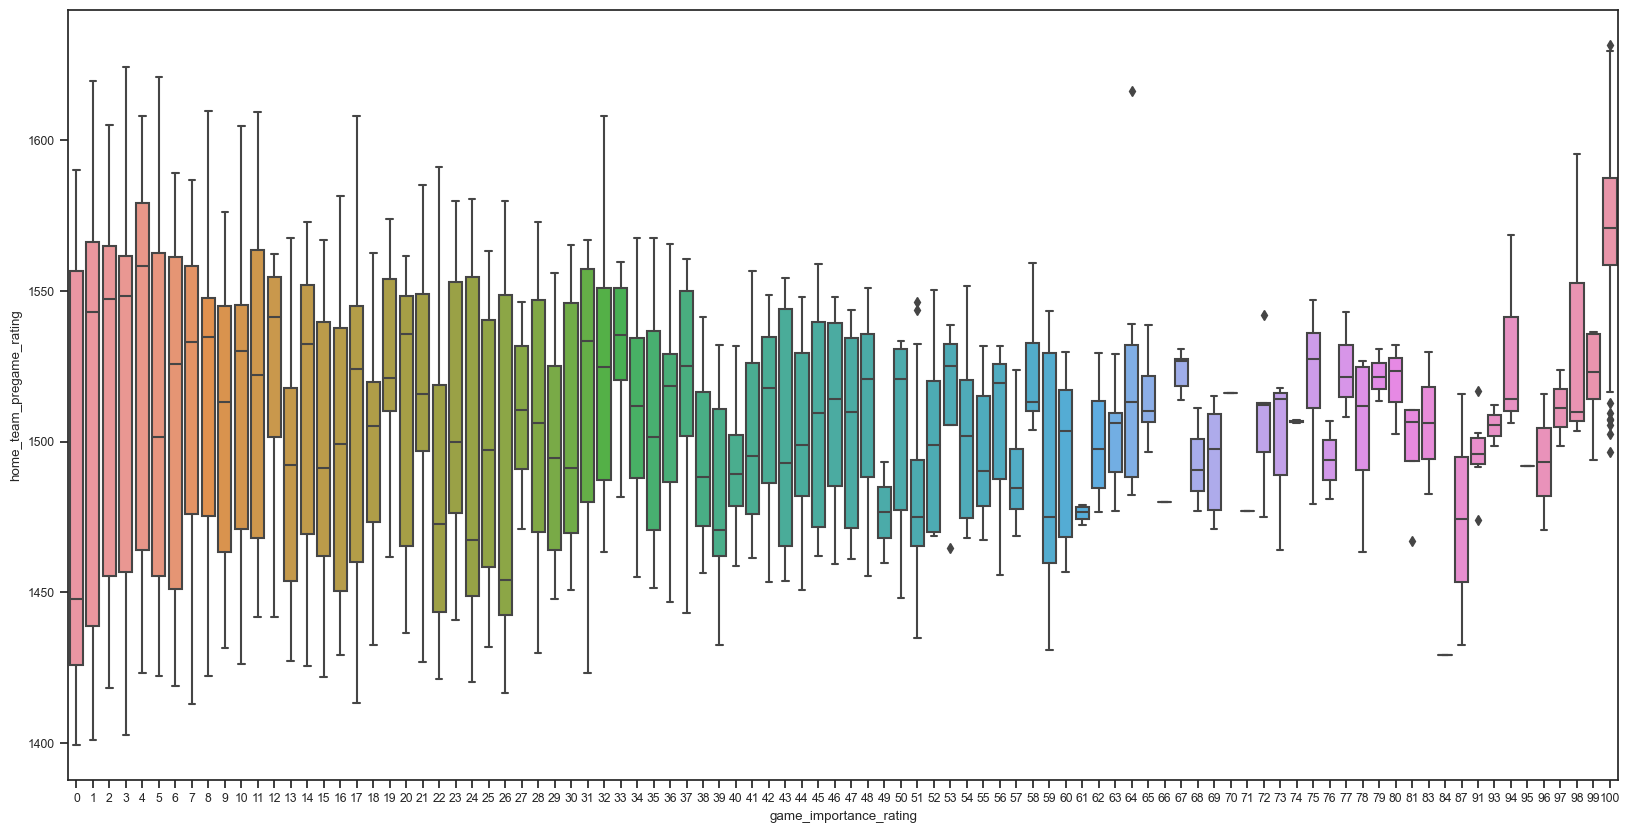

In [9]:
#pair plots
#hue='avg_attendance'
plt.figure(figsize=(20,10))
sns.set_theme(style="ticks", font_scale=0.8)
sns.boxplot(x='game_importance_rating',y='home_team_pregame_rating',data=df, orient="v")

## The above boxplot shows correlation between the hometeam pregame rating and overall game importance.
From the eye test, it appears that home teams with a higher rating, are more likely to have important games. This would make sense as home teams should have a small advantage, thus making it that much more important to getting points for playoffs.

<AxesSubplot:xlabel='avg_attendance', ylabel='home_team_postgame_rating'>

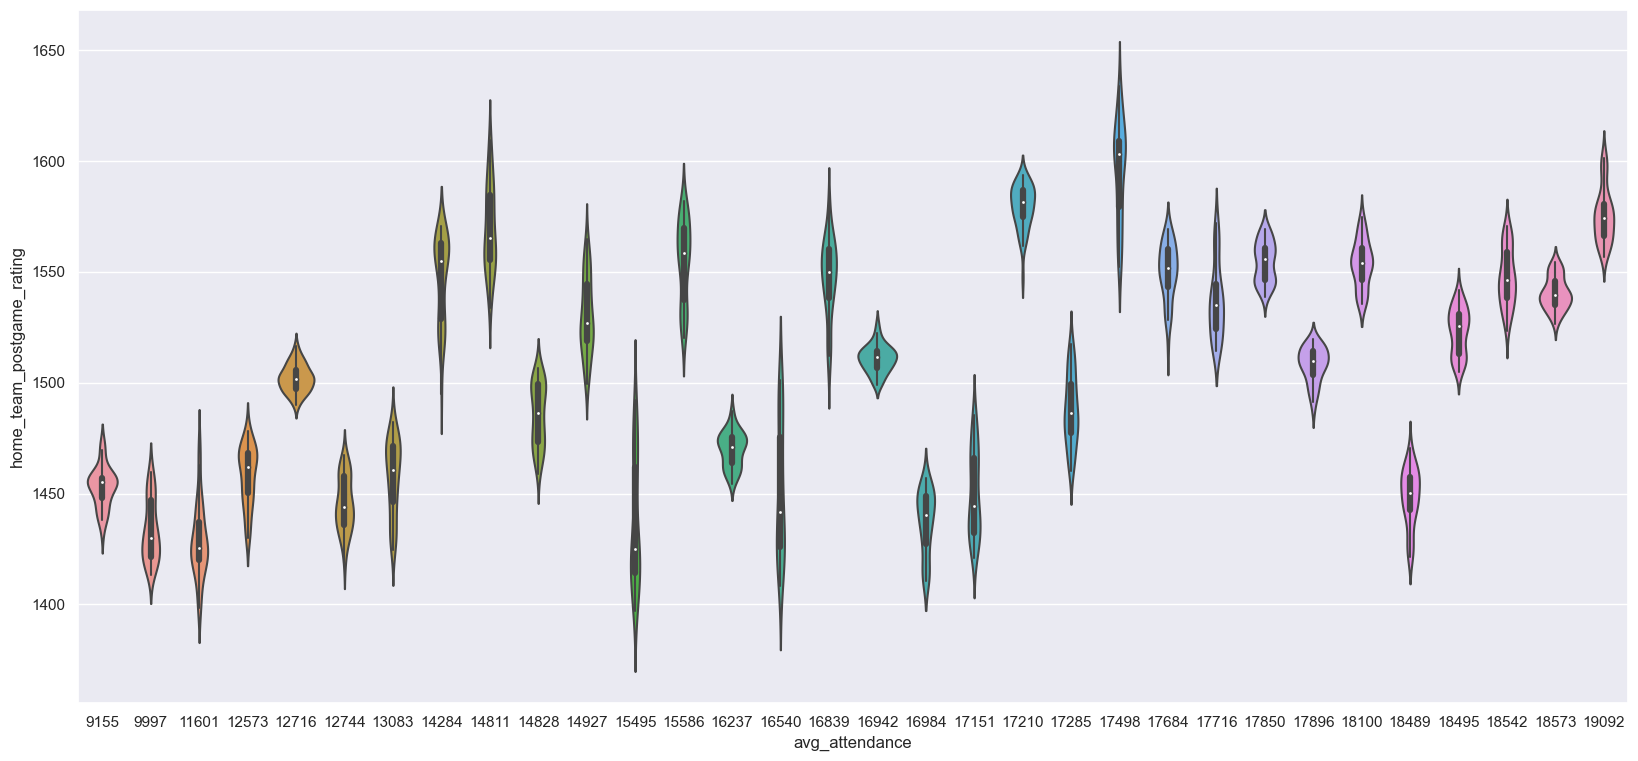

In [10]:
plt.figure(figsize=(20,9))
sns.set_style('darkgrid')
sns.set_theme(font_scale=1)
sns.violinplot(x='avg_attendance',y='home_team_postgame_rating',data=df)

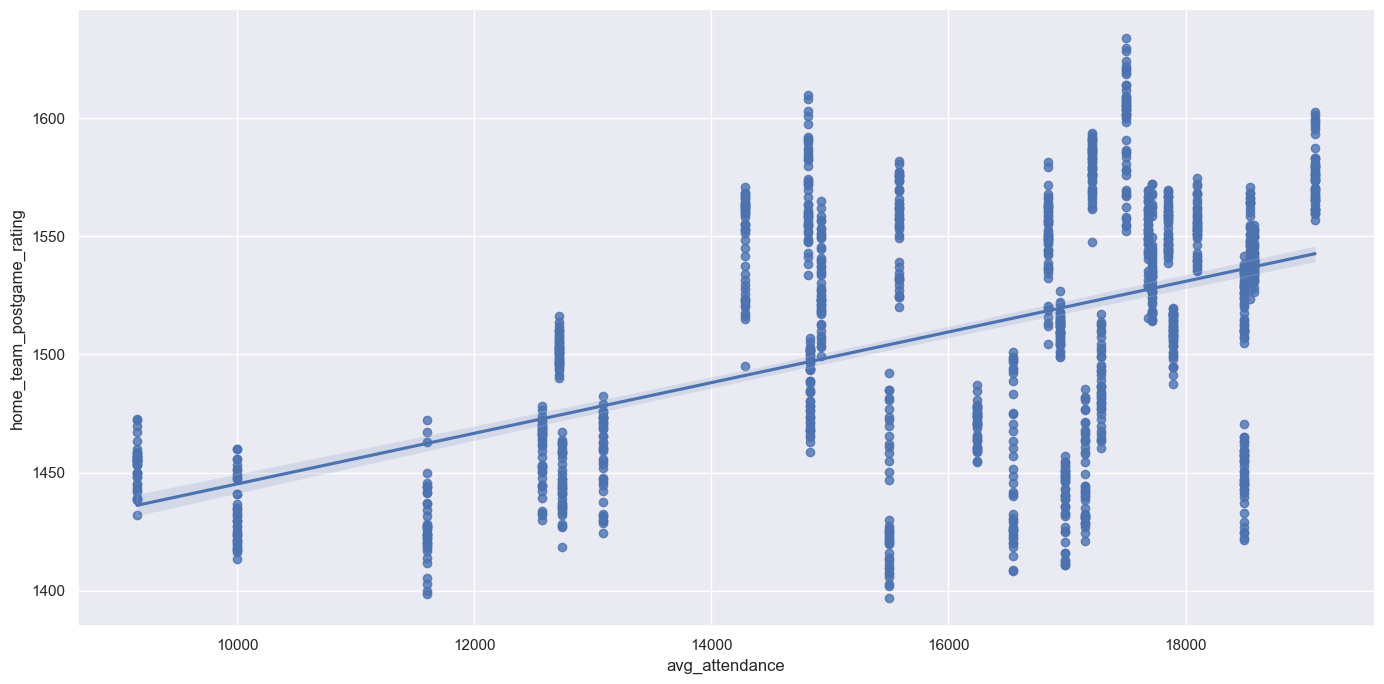

In [11]:
sns.lmplot(x='avg_attendance',y='home_team_postgame_rating',data=df, height=7, aspect=2)

## The above plots show the postgame ratings of teams based on their home attendance.
As you would expect, better teams have a higher attendance. However, this is not enough to conclude that having a higher attendance leads to more wins.

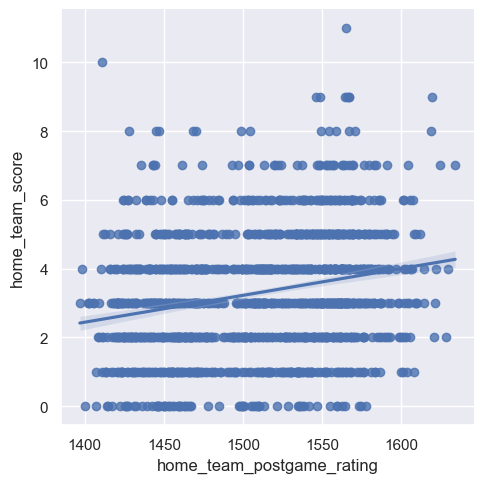

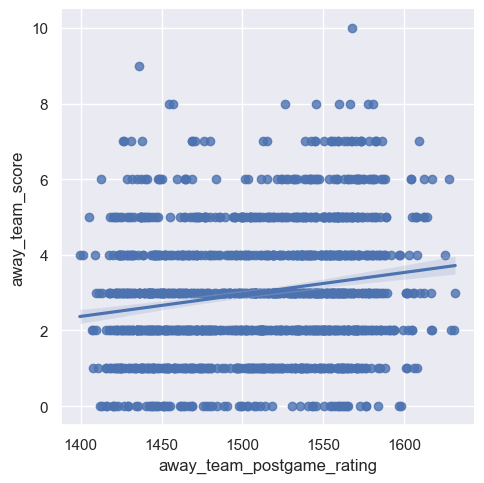

In [12]:
#Remove potentially
sns.lmplot(x='home_team_postgame_rating',y='home_team_score',data=df)
sns.lmplot(x='away_team_postgame_rating',y='away_team_score',data=df)

## The above plots show the amount of goals home and away teams score based on their postgame ratings.
As expected, better teams score more goals.

___

## Milestone 3 Task 2 - Analysis Pipeline

- Cleaning data
- Processing data
- Wrangling data

Below is the initial code written before method chaining and creating a function in a python file.

In [13]:
# Adding team, team abbreviation, wins, losses, overtime losses, game number, goals for, goals against, points

#df_winslosses = (df.loc[df["date"].index.repeat(2),:].reset_index(drop=True))

#df_winslosses = (
#                df_winslosses.drop(columns=["season", "neutral", "status"])
#                .loc[df_winslosses["playoff"] == 0]
#                .reset_index(drop=True)
#)


#df_winslosses["team"] = np.where(df_winslosses.index % 2, df_winslosses["away_team"], df_winslosses["home_team"] )
#df_winslosses["abbr"] = np.where(df_winslosses.index % 2, df_winslosses["away_team_abbr"], df_winslosses["home_team_abbr"] )

#df_winslosses["wins"] = 0
#df_winslosses["wins"] = np.where((df_winslosses["team"] == df_winslosses["home_team"]) & (df_winslosses["home_team_score"] > df_winslosses["away_team_score"]), df_winslosses["wins"]+1, df_winslosses["wins"])
#df_winslosses["wins"] = np.where((df_winslosses["team"] == df_winslosses["away_team"]) & (df_winslosses["away_team_score"] > df_winslosses["home_team_score"]), df_winslosses["wins"]+1, df_winslosses["wins"])

#df_winslosses["losses"] = 0
#df_winslosses["losses"] = np.where((df_winslosses["team"] == df_winslosses["home_team"]) & (df_winslosses["home_team_score"] < df_winslosses["away_team_score"]) & df_winslosses["ot"].isnull() , df_winslosses["losses"]+1, df_winslosses["losses"])
#df_winslosses["losses"] = np.where((df_winslosses["team"] == df_winslosses["away_team"]) & (df_winslosses["away_team_score"] < df_winslosses["home_team_score"]) & df_winslosses["ot"].isnull(), df_winslosses["losses"]+1 , df_winslosses["losses"])

#df_winslosses["otl"] = 0
#df_winslosses["otl"] = np.where((df_winslosses["team"] == df_winslosses["home_team"]) & (df_winslosses["home_team_score"] < df_winslosses["away_team_score"]) & df_winslosses["ot"].notnull() , df_winslosses["otl"]+1, df_winslosses["otl"])
#df_winslosses["otl"] = np.where((df_winslosses["team"] == df_winslosses["away_team"]) & (df_winslosses["away_team_score"] < df_winslosses["home_team_score"]) & df_winslosses["ot"].notnull() , df_winslosses["otl"]+1 , df_winslosses["otl"])


#df_winslosses = (
#                df_winslosses.drop(columns=["home_team_abbr", "away_team_abbr", "playoff", "ot", "overtime_prob", "home_team_expected_points", "away_team_expected_points"])
#                .sort_values(by=['team', 'date'], ascending=True)
#                .reset_index(drop=True)
#)


#team_set = set(df_winslosses["team"])

#df_winslosses["game_num"] = 0

#df_winslosses["gf"] = 0
#df_winslosses["gf"] = np.where((df_winslosses["team"] == df_winslosses["home_team"]), df_winslosses["home_team_score"], df_winslosses["away_team_score"])
                               
#df_winslosses["ga"] = 0
#df_winslosses["ga"] = np.where((df_winslosses["team"] == df_winslosses["home_team"]), df_winslosses["away_team_score"], df_winslosses["home_team_score"])                                                           

#for team in team_set:
    
#    count = 0
#    wins = 0
#    losses = 0
#    otls = 0
#    gf = 0
#    ga = 0
    
#    for index in df_winslosses.index:
            
#        if (df_winslosses.loc[index, "team"] == team ):
            
#            count += 1;
#            wins += df_winslosses.loc[index, 'wins']
#            losses += df_winslosses.loc[index, 'losses']
#            otls += df_winslosses.loc[index, 'otl']
#            gf += df_winslosses.loc[index, 'gf']
#            ga += df_winslosses.loc[index, 'ga']
            
#            df_winslosses.loc[index, 'game_num'] = count
#            df_winslosses.loc[index, 'wins'] = wins
#            df_winslosses.loc[index, 'losses'] = losses
#            df_winslosses.loc[index, 'otl'] = otls
#            df_winslosses.loc[index, 'gf'] = gf
#            df_winslosses.loc[index, 'ga'] = ga
            
            
#df_winslosses['pts'] = (df_winslosses['wins'] * 2) + (df_winslosses['otl'])
            
            
#df_winslosses.to_csv("nhl_elo_processed_v02.csv", index=None)       
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#df_winslosses


___

## Milestone 3 Task 3 - Method Chaining and Python Program

In [14]:
import project_functions3_AZ

df = project_functions3_AZ.load_and_process("../data/processed/nhl_elo_processed.csv")
df

,date,home_team,away_team,home_team_pregame_rating,away_team_pregame_rating,home_team_winprob,away_team_winprob,home_team_score,away_team_score,home_team_postgame_rating,...,avg_attendance,team,abbr,wins,losses,otl,game_num,gf,ga,pts
0,2021-10-13,Anaheim Ducks,Winnipeg Jets,1451.044558,1507.938836,0.490080,0.509920,4,1,1455.770072,...,13083,Anaheim Ducks,ANA,1,0,0,1,4,1,2
1,2021-10-15,Anaheim Ducks,Minnesota Wild,1455.770072,1525.273213,0.471962,0.528038,1,2,1453.512538,...,13083,Anaheim Ducks,ANA,1,1,0,2,5,3,2
2,2021-10-18,Calgary Flames,Anaheim Ducks,1498.126080,1453.512538,0.632891,0.367109,2,3,1494.922103,...,14284,Anaheim Ducks,ANA,2,1,0,3,8,5,4
3,2021-10-19,Edmonton Oilers,Anaheim Ducks,1521.557405,1456.716515,0.659502,0.340498,6,5,1523.114379,...,14927,Anaheim Ducks,ANA,2,2,0,4,13,11,4
4,2021-10-21,Winnipeg Jets,Anaheim Ducks,1499.046407,1455.159542,0.631919,0.368081,5,1,1502.703314,...,12716,Anaheim Ducks,ANA,2,3,0,5,14,16,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,2022-04-21,Carolina Hurricanes,Winnipeg Jets,1573.902923,1490.411528,0.683183,0.316817,4,2,1576.166332,...,17210,Winnipeg Jets,WPG,35,32,11,78,237,252,81
2620,2022-04-24,Winnipeg Jets,Colorado Avalanche,1488.148119,1612.163741,0.395066,0.604934,4,1,1493.944571,...,12716,Winnipeg Jets,WPG,36,32,11,79,241,253,83
2621,2022-04-27,Winnipeg Jets,Philadelphia Flyers,1493.944571,1415.354280,0.677045,0.322955,4,0,1497.102033,...,12716,Winnipeg Jets,WPG,37,32,11,80,245,253,85
2622,2022-04-29,Winnipeg Jets,Calgary Flames,1497.102033,1571.074587,0.465555,0.534445,3,1,1501.216971,...,12716,Winnipeg Jets,WPG,38,32,11,81,248,254,87


## Milestone 3 Task  4 - Analysis

### Briefly redoing EDA to see how new dataframe shapes up.

Redid the heatmap to see correlations after wrangling data.

<AxesSubplot:>

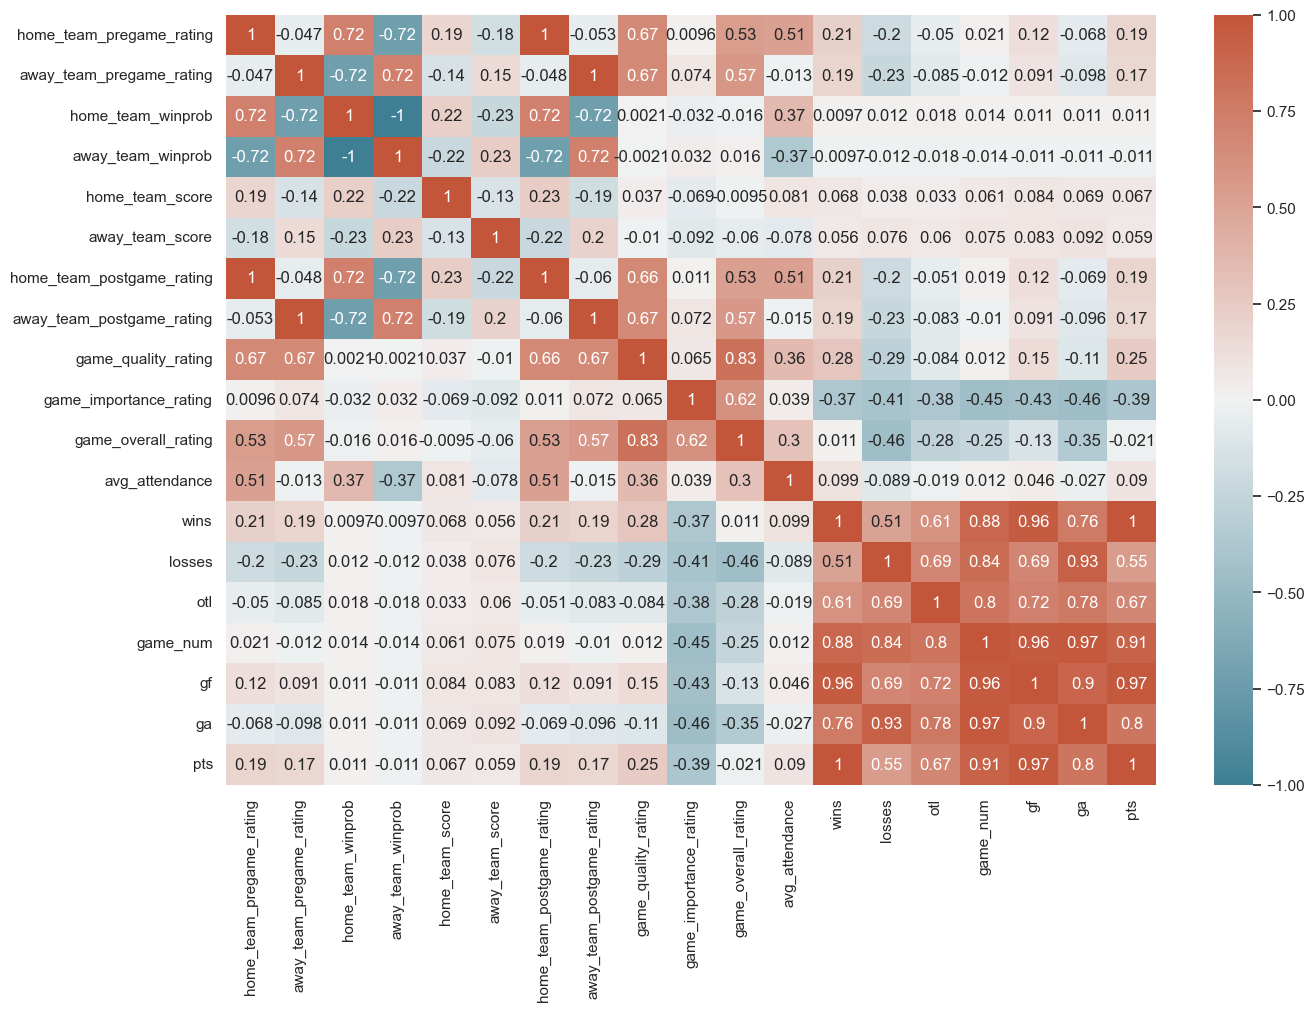

In [15]:
corr = df.corr()# plot the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [16]:
df.describe()

,home_team_pregame_rating,away_team_pregame_rating,home_team_winprob,away_team_winprob,home_team_score,away_team_score,home_team_postgame_rating,away_team_postgame_rating,game_quality_rating,game_importance_rating,game_overall_rating,avg_attendance,wins,losses,otl,game_num,gf,ga,pts
count,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000
mean,1504.542688,1504.603132,0.568345,0.431655,3.268293,3.021341,1504.286460,1504.859360,46.741616,20.950457,33.608994,15841.343750,20.786966,16.144436,4.568598,41.500000,127.771723,127.556402,46.142530
std,51.549390,51.547943,0.101558,0.101558,1.820701,1.719437,52.011305,51.774093,32.559391,23.251149,20.594711,2575.896366,13.405803,11.005046,3.189267,23.674112,77.575569,76.954140,28.858488
min,1399.418091,1396.925277,0.294438,0.201711,0.000000,0.000000,1396.925277,1399.418091,0.000000,0.000000,0.000000,9155.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1458.647168,1458.379675,0.496385,0.357003,2.000000,2.000000,1458.343607,1457.475205,17.000000,2.000000,16.000000,14679.250000,10.000000,7.000000,2.000000,21.000000,61.000000,61.000000,22.000000
50%,1509.706479,1509.970100,0.569746,0.430254,3.000000,3.000000,1509.779157,1510.529268,43.000000,13.000000,33.000000,16890.500000,19.000000,15.000000,4.000000,41.500000,123.000000,125.000000,44.000000
75%,1548.870703,1549.023810,0.642997,0.503615,4.000000,4.000000,1549.229482,1549.525607,76.250000,32.000000,51.000000,17749.500000,30.000000,23.000000,6.250000,62.000000,189.000000,190.000000,67.000000
max,1624.172514,1620.686249,0.798289,0.705562,11.000000,10.000000,1624.172514,1617.138221,100.000000,100.000000,95.000000,19092.000000,58.000000,50.000000,14.000000,82.000000,340.000000,319.000000,122.000000


___
### Q1: Can you accurately predict end of season standings from the first 20 games?

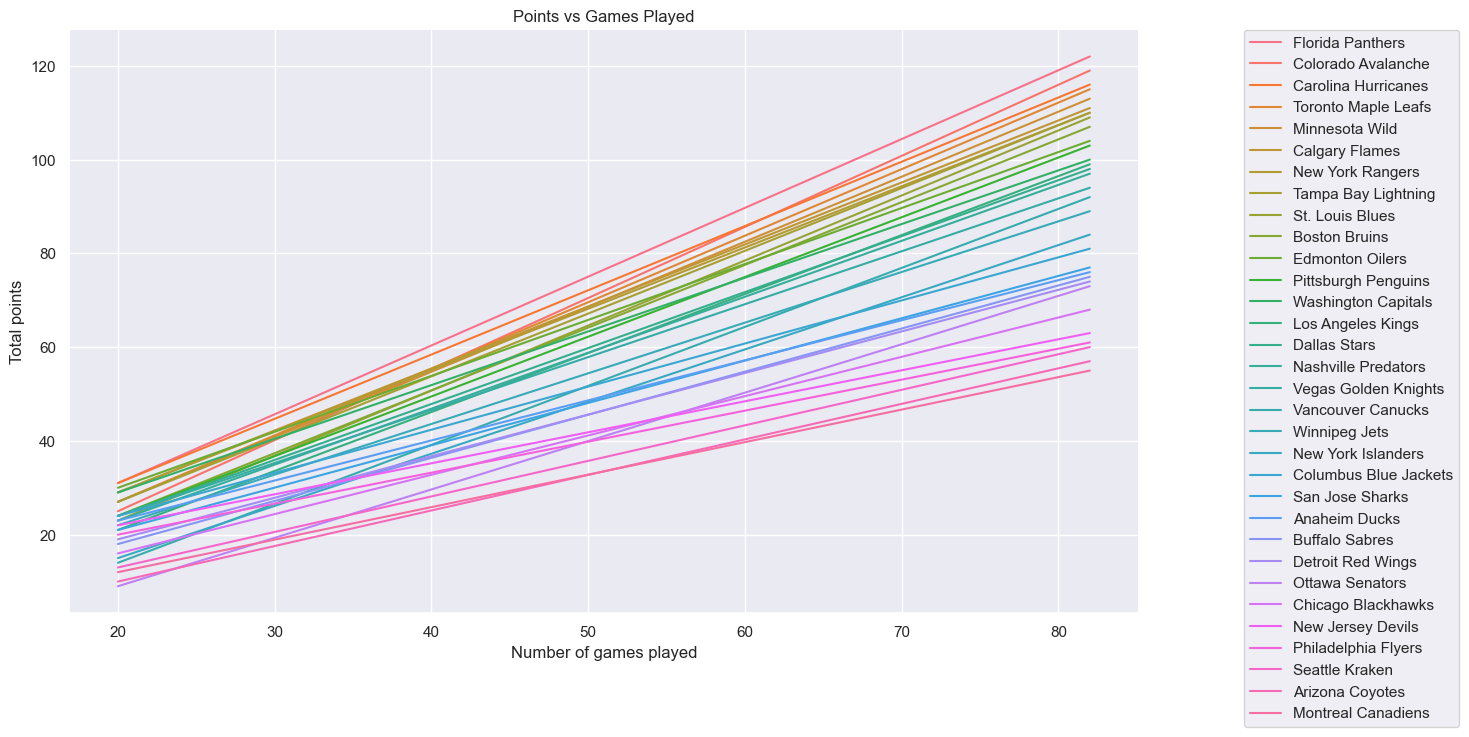

In [17]:
df_game20vs80 = (
            df.loc[(df["game_num"] == 20) | (df["game_num"] == 82)]
            .sort_values(by=['pts'], ascending=False)
            .reset_index(drop=True)
)


g = sns.relplot(data = df_game20vs80, x = 'game_num', y = 'pts', hue = 'team', kind='line')
g.fig.set_size_inches(20,7)
g.set(xlabel ="Number of games played", ylabel = "Total points", title='Points vs Games Played')
g.legend.remove()
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0)



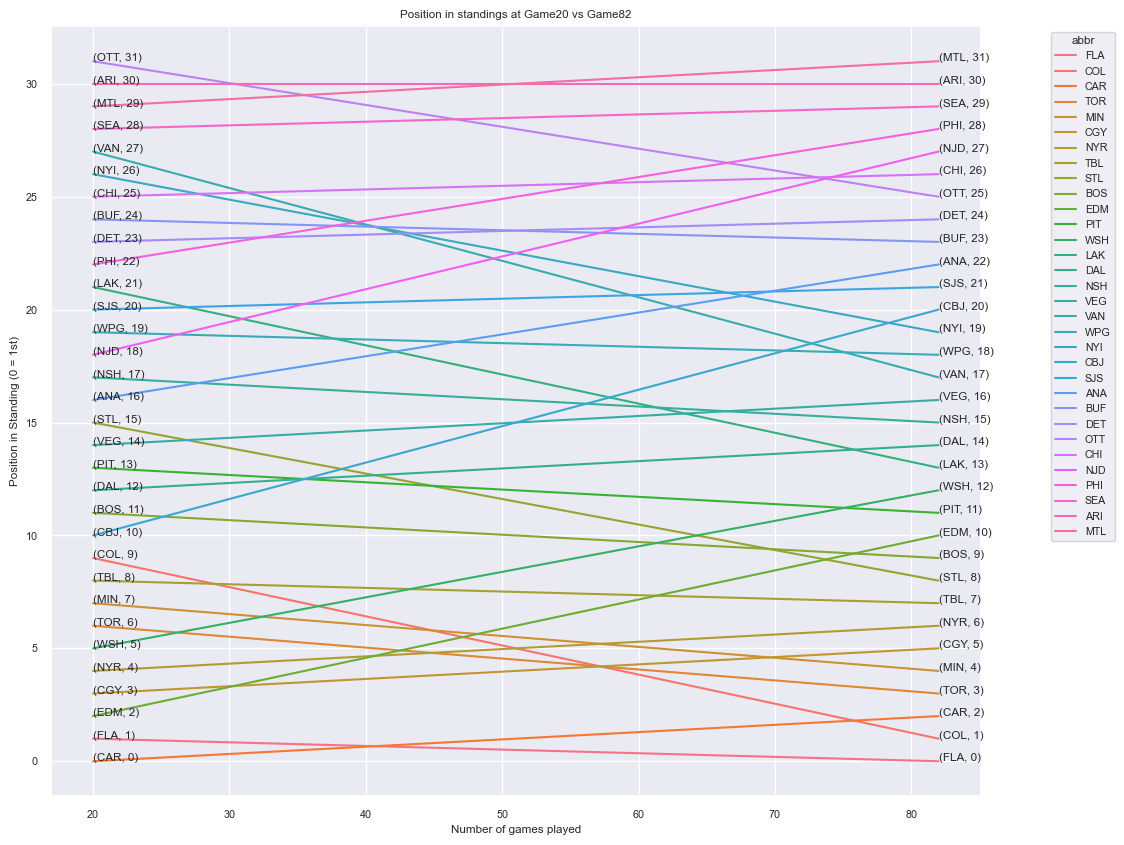

In [18]:
df_pos82 = pd.DataFrame(columns=['abbr', 'game82'])
df_pos20 = pd.DataFrame(columns=['abbr', 'game20'])

sns.set(rc={"figure.figsize":(12, 10)})
sns.set(font_scale=0.7)
ax = sns.lineplot(data = df_game20vs80, x = 'game_num', y = (df_game20vs80.index % 32), hue = 'abbr')
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.15, 1))
ax.set(xlabel ="Number of games played", ylabel = "Position in Standing (0 = 1st)", title='Position in standings at Game20 vs Game82')

for game_num, index, abbr in zip(df_game20vs80['game_num'], df_game20vs80.index % 32, df_game20vs80['abbr']):
    ax.annotate(f'({abbr}, {index})', xy=(game_num, index))
    if game_num == 82:
        df_pos82 = pd.concat([df_pos82, pd.DataFrame(data = [[abbr, index]], columns = ['abbr', 'game82'])])
    else:
        df_pos20 = pd.concat([df_pos20, pd.DataFrame(data = [[abbr, index]], columns = ['abbr', 'game20'])])

### Lower position in ranking means that they are higher in the standings.
I.e. Position 0 = 1st in the NHL

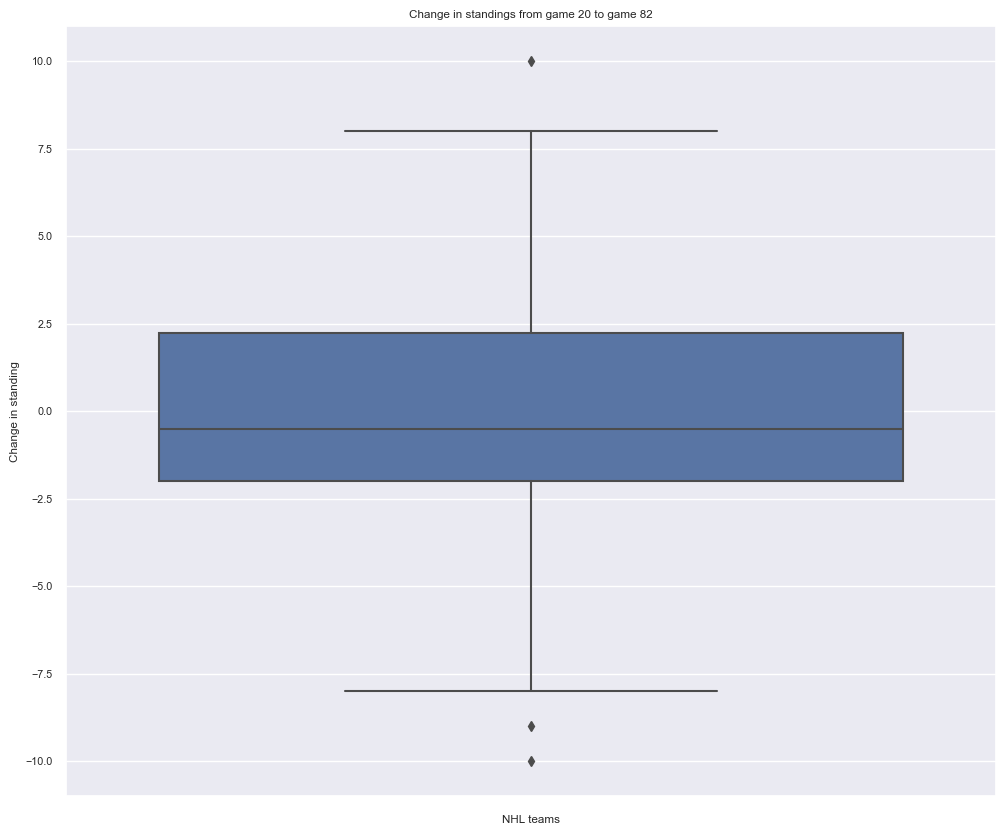

,count,mean,std,min,25%,50%,75%,max
change,32.0,0.0,5.048155,-10.0,-2.0,-0.5,2.25,10.0


In [19]:
df_poschange = pd.merge(df_pos82, df_pos20, on="abbr")
df_poschange['change'] = df_poschange['game20'] - df_poschange['game82']

fig = sns.boxplot(y='change',data=df_poschange)
plt.ylabel("Change in standing")
plt.xlabel("NHL teams")
plt.title('Change in standings from game 20 to game 82')
plt.show(fig)

df_change = df_poschange.drop(columns=["abbr", "game20", "game82"])
df_change['change'] = df_change['change'].astype('int')
df_change.describe().T

In the 2021 - 2022 season the following can be said about the changes in standings throughout the season:
- Mean: 0
- 1st Quartile was -2
- 3rd Quartile was 2.25 
- IQR (Interquartile range): 4.25 
- STD: 5
- Max change: +/- 10

When you consider that there are 32 teams in the NHL, it appears that there is very little overall movement from the 20 game mark to the 82 game mark. The absolute outliers being 10 spots gained or lost.

___
### Q2: Do 538's Game Quality scores accurately represent what humans perceive to be a quality game?


<AxesSubplot:>

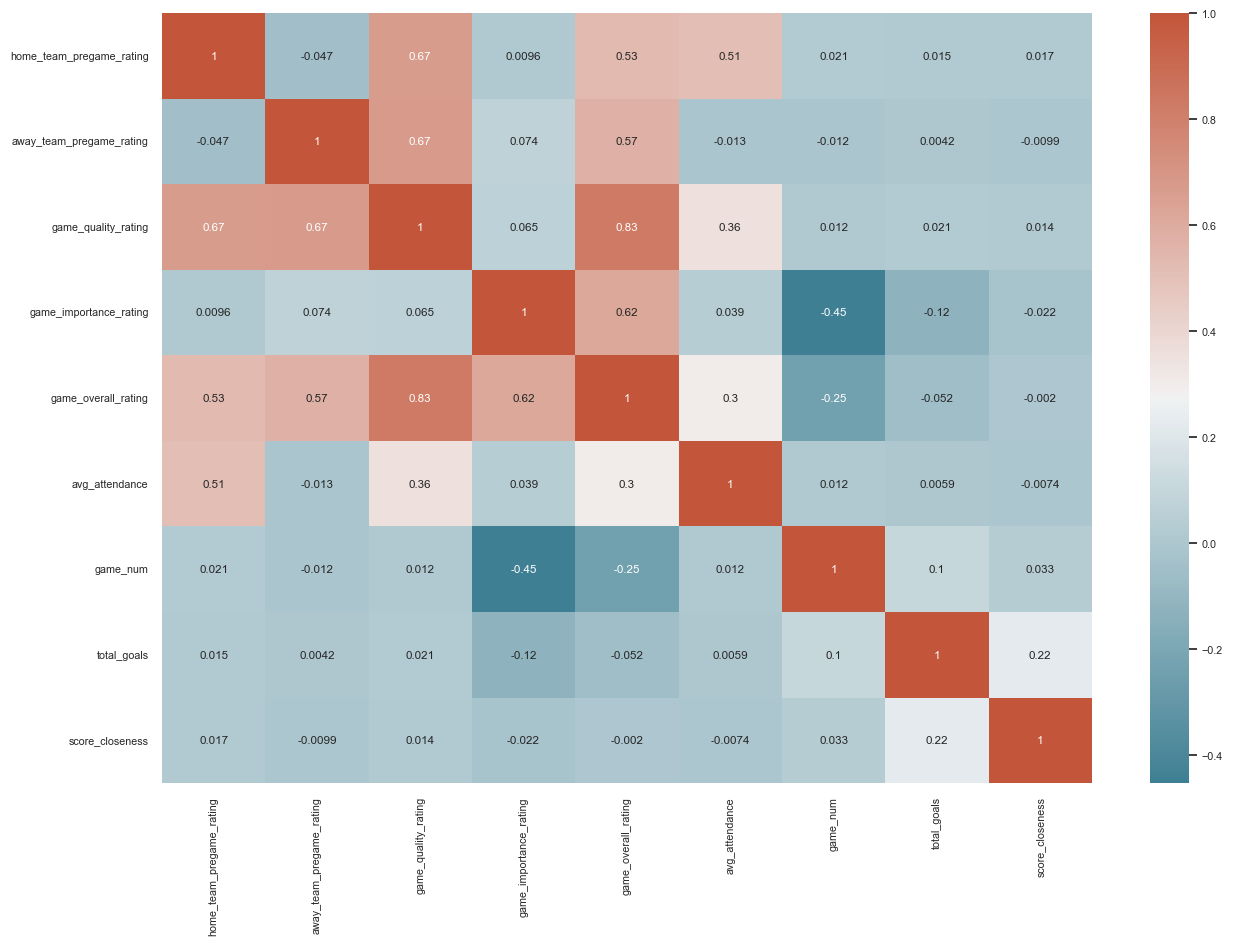

In [20]:
df_quality = df

df_quality['total_goals'] = df_quality['home_team_score'] + df_quality['away_team_score']
df_quality['score_closeness'] = df_quality['home_team_score'] - df_quality['away_team_score']
df_quality['score_closeness'] = df_quality['score_closeness'].abs()

df_quality = df_quality.drop(columns=["date", "home_team", "away_team", "home_team_winprob", "away_team_winprob", "home_team_score", "away_team_score", "home_team_postgame_rating", "away_team_postgame_rating", "team", "abbr", "wins", "losses", "otl", "gf", "ga", "pts"])

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

corr = df_quality.corr()# plot the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In my opinion, a quality NHL hockey game can involve any of the following:
- lots of goals
- a small goal differential
- a higher game number (meaning it is closer to the playoffs and teams would be competing harder for points)
- involves good teams (highly rated)

However, in looking at the heatmap, only team ratings and attendance seem to have a strong correlation with 538's "Game Quality Rating".
As a result, I would say that the game quality rating isn't really accurate to what a human would perceive. I will also show the correlations between total goals and score closeness vs. game quality to better see whether there is a relationship.

<Figure size 2500x1800 with 0 Axes>

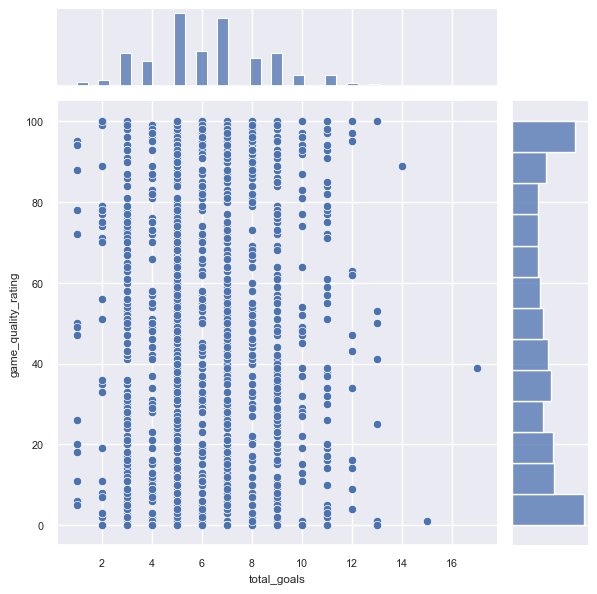

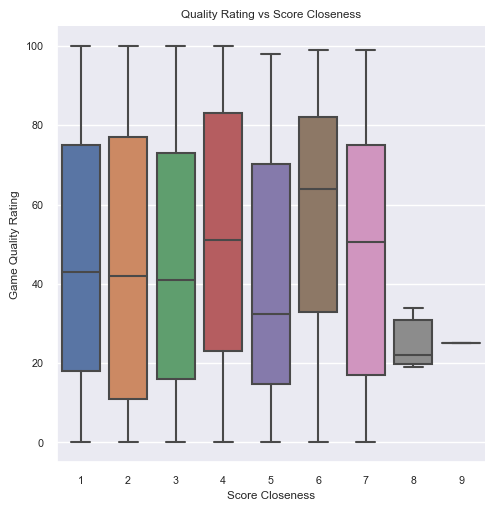

In [24]:
plt.figure(figsize=(25,18))
sns.jointplot(x='total_goals',y='game_quality_rating',data=df_quality)

ax = sns.catplot(x='score_closeness',y='game_quality_rating',data=df_quality, kind='box')
ax.set(xlabel='Score Closeness', ylabel='Game Quality Rating', title='Quality Rating vs Score Closeness')

I would have expected higher total goals to result in a higher game quality. Coincidentally I would have thought that a lower score_closeness would have also resulted in a higher game quality. Neither of those things appear to be true. Ultimately it seems that 538's Game Quality Rating is mostly based on whether the 2 teams playing have high ratings and are therefore "good" teams.

___
### Q3: Does a higher fan attendance result in a higher home advantage vs. lower?

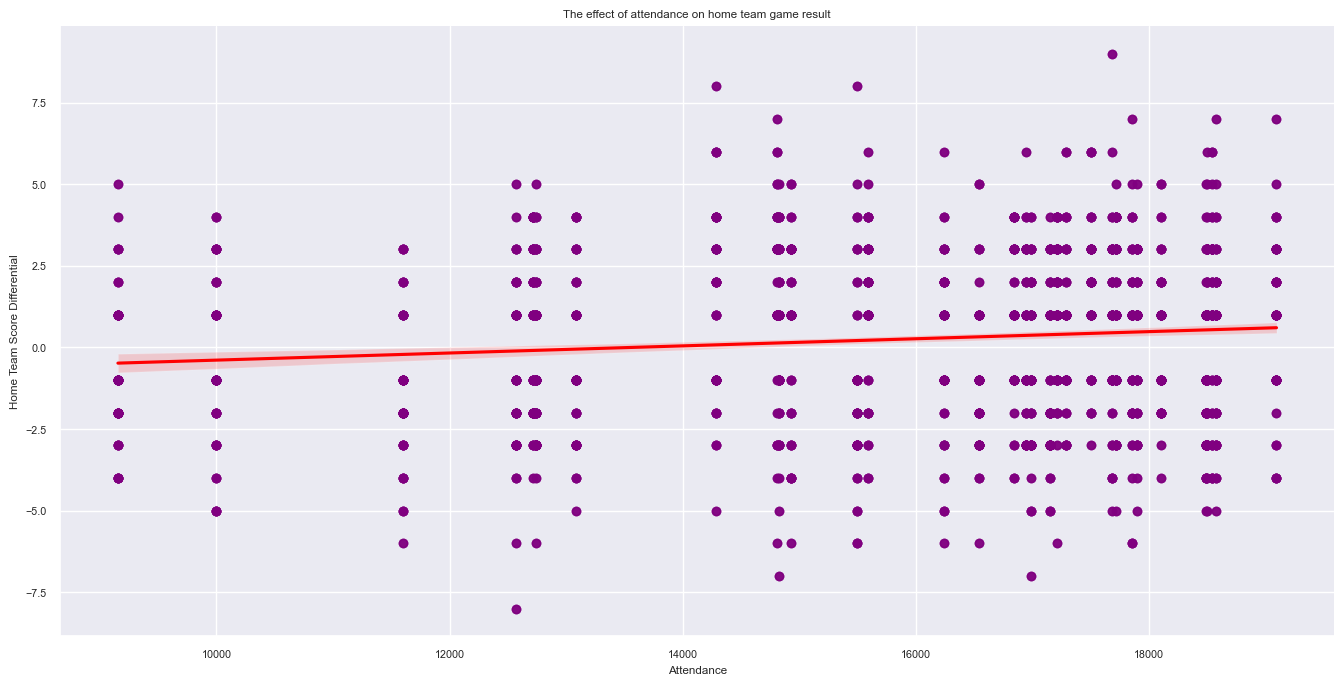

In [22]:

df['home_score_diff'] = df['home_team_score'] - df['away_team_score']

g = sns.lmplot(x='avg_attendance',y='home_score_diff',data=df , line_kws={'color': 'red'} , scatter_kws={'color':'purple'})
g.fig.set_size_inches(15,7)
g.set(xlabel ="Attendance", ylabel = "Home Team Score Differential", title='The effect of attendance on home team game result')


In [23]:
home_score_avg = df['home_score_diff'].mean()
home_score_avg

0.24695121951219512

The lmplot appears to have a positive regression line implying that higher attendance results in a better home team score differential (positive score differential = win, negative = loss). However, it must also be considered that better teams are likely to have a higher attendance than worse teams, this may play a part in the increase in home performance. On average, home teams are likely to have 0.25 more goals than road teams. This shows that a home team advantage definitely exists in the NHL but it may be hard to discern how much of an effect attendance has on it.

___